# Tennis Data Explatory Analysis!

### 1. Importing Libraries

In [1]:
#Import all the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import os


### 2. Getting the Data and a first look

In [2]:
#There are 18 different CSV's inside the ATM Match Data folder.  This is all combined into one DataFrame
dataframes = []
for  filename in sorted(os.listdir("Atm Match Data")):
        dataframes.append(pd.read_csv("ATM Match Data/"+filename))

tennis_df = pd.concat(dataframes, ignore_index = True)
tennis_df.head()


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
0,2000-717,Orlando,Clay,32,A,20000501.0,1.0,102179,NaN,NaN,...,15.0,13.0,4.0,110.0,59.0,49.0,31.0,17.0,4.0,4.0
1,2000-717,Orlando,Clay,32,A,20000501.0,2.0,103602,NaN,Q,...,6.0,0.0,0.0,57.0,24.0,13.0,17.0,10.0,4.0,9.0
2,2000-717,Orlando,Clay,32,A,20000501.0,3.0,103387,NaN,NaN,...,0.0,2.0,2.0,65.0,39.0,22.0,10.0,8.0,6.0,10.0
3,2000-717,Orlando,Clay,32,A,20000501.0,4.0,101733,NaN,NaN,...,12.0,4.0,6.0,104.0,57.0,35.0,24.0,15.0,6.0,11.0
4,2000-717,Orlando,Clay,32,A,20000501.0,5.0,101727,4.0,NaN,...,1.0,0.0,3.0,47.0,28.0,17.0,10.0,8.0,3.0,6.0


In [3]:
tennis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53571 entries, 0 to 53570
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tourney_id          53508 non-null  object 
 1   tourney_name        53494 non-null  object 
 2   surface             52250 non-null  object 
 3   draw_size           53508 non-null  object 
 4   tourney_level       53500 non-null  object 
 5   tourney_date        53440 non-null  float64
 6   match_num           53440 non-null  float64
 7   winner_id           53508 non-null  object 
 8   winner_seed         24126 non-null  float64
 9   winner_entry        9221 non-null   object 
 10  winner_name         53472 non-null  object 
 11  winner_hand         53458 non-null  object 
 12  winner_ht           50861 non-null  float64
 13  winner_ioc          53468 non-null  object 
 14  winner_age          53456 non-null  float64
 15  winner_rank         52421 non-null  float64
 16  winn

In [4]:
tennis_df.describe()

,tourney_date,match_num,winner_seed,winner_ht,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_ht,...,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
count,5.344000e+04,53440.000000,24126.000000,50861.000000,53456.000000,52421.000000,52421.000000,53468.000000,14474.000000,48895.000000,...,44451.000000,44451.000000,44451.000000,44451.000000,44451.000000,44451.000000,44451.000000,44451.000000,44451.000000,44451.000000
mean,1.884863e+07,90.081475,6.720095,173.750437,27.381087,79.552622,1402.170809,97582.002544,7.634379,178.366725,...,5.029493,4.962588,3.369598,80.143866,47.634541,31.679242,14.939191,12.171132,4.750422,8.623608
std,4.805228e+06,411.368835,6.320703,45.405630,8.398563,141.729425,1908.851406,25050.768626,6.891200,27.171308,...,4.020617,4.745265,2.520632,28.983687,19.011993,14.202139,7.255294,4.194847,3.249433,4.110891
min,1.000000e+00,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.003011e+07,8.000000,3.000000,180.000000,23.444216,19.000000,460.000000,102905.000000,3.000000,180.000000,...,2.000000,2.000000,2.000000,59.000000,34.000000,22.000000,10.000000,9.000000,2.000000,6.000000
50%,2.007021e+07,21.000000,5.000000,185.000000,26.083504,43.000000,828.000000,103799.000000,6.000000,185.000000,...,4.000000,4.000000,3.000000,75.000000,44.000000,29.000000,14.000000,11.000000,4.000000,8.000000
75%,2.011061e+07,40.000000,8.000000,190.000000,28.908966,82.000000,1510.000000,104559.000000,10.000000,188.000000,...,7.000000,7.000000,5.000000,96.000000,58.000000,39.000000,19.000000,15.000000,7.000000,11.000000
max,2.015113e+07,16950.000000,35.000000,208.000000,147.000000,2101.000000,15785.000000,200273.000000,35.000000,246.000000,...,30.000000,103.000000,23.000000,489.000000,328.000000,284.000000,101.000000,91.000000,25.000000,34.000000


In [5]:
tennis_df.columns


Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'winner_rank', 'winner_rank_points', 'loser_id', 'loser_seed',
       'loser_entry', 'loser_name', 'loser_hand', 'loser_ht', 'loser_ioc',
       'loser_age', 'loser_rank', 'loser_rank_points', 'score', 'best_of',
       'round', 'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon',
       'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df',
       'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved',
       'l_bpFaced'],
      dtype='object')

### Cleaning and Organizing the Data

In [6]:
#these dates are faulty.  It couls possibly have some meaning, but this error shows up for all the data after September 2015.
tennis_df.loc[52900:52910,"tourney_date"]

52900    46.0
52901    44.0
52902    67.0
52903    89.0
52904    35.0
52905    69.0
52906    53.0
52907    57.0
52908    32.0
52909    60.0
52910    50.0
Name: tourney_date, dtype: float64

In [7]:
#Organizing the Date and converting it to pandas DateTime
tennis_df["tourney_date"] = tennis_df["tourney_date"].map(lambda x: str(x)[4:6]+"/"+str(x)[6:8]+"/"+str(x)[:4])
tennis_df["tourney_date"] = pd.to_datetime(tennis_df["tourney_date"], errors = 'ignore')




In [8]:
#This will rearrange the columns to be more convenient, and also delete any unnecessary cols.
#For example, winner and loser seed is almost unnecessary, since it is based on player ranking, 
# and winner_entry gives statistics like "Wildcard" which has very little use.  
cols = ['tourney_name', 'surface', 'tourney_level', 'tourney_date', 'score', 'winner_name', 'loser_name','round', 'minutes',
        'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'winner_rank', 'winner_rank_points', 'loser_hand', 'loser_ht', 'loser_ioc',
       'loser_age', 'loser_rank', 'loser_rank_points', 'best_of',
         'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon',
       'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df',
       'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved',
       'l_bpFaced', ]
tennis_df = tennis_df[cols]

<AxesSubplot:>

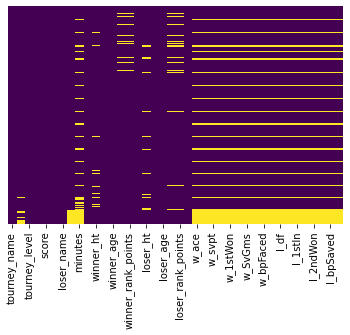

In [9]:
#Check for missing values
sns.heatmap(tennis_df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')


In [10]:
#Time to impute those missing values!  I will use the average value to impute it.
numericalCols = [col for col in tennis_df.columns if tennis_df[col].dtype != object]
for column in numericalCols:
    tennis_df[column].fillna(tennis_df[column].mean(), inplace = True)


<AxesSubplot:>

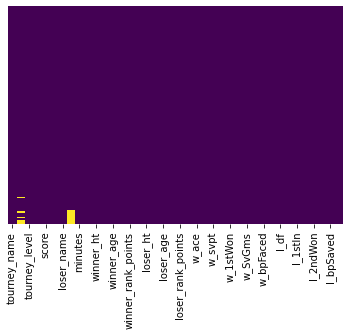

In [11]:
sns.heatmap(tennis_df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')


It would be a lot more convenient if the data was based on the stats of each player, instead of each match.  Therefore, I will create a second Dataframe that is organized by player.

In [12]:
playerList = tennis_df["winner_name"].unique()

#initializing the player_data Dataframe
player_data = {player:[0]*10 for player in playerList}

#Reshaping the data to be fit per player.  This is slightly tricky, since their stats are separated into when they won and when they lost.
winnerSum = tennis_df.groupby('winner_name').sum()
loserSum = tennis_df.groupby('loser_name').sum()
for player in playerList:
    try:
        player_data[player][0] = tennis_df["winner_name"].value_counts().loc[player]
        player_data[player][1] = tennis_df["loser_name"].value_counts().loc[player]
        player_data[player][2] = winnerSum.loc[player, "w_ace"] + loserSum.loc[player, "l_ace"]
        player_data[player][3] = winnerSum.loc[player, "w_bpSaved"] + loserSum.loc[player, "l_bpSaved"]
        player_data[player][4] = winnerSum.loc[player, "w_bpFaced"] + loserSum.loc[player, "l_bpFaced"] 
        player_data[player][5] = winnerSum.loc[player, "w_1stIn"] + loserSum.loc[player, "l_1stIn"] 
        player_data[player][6] = winnerSum.loc[player, "w_1stWon"] + loserSum.loc[player, "l_1stWon"] 
        player_data[player][7] = winnerSum.loc[player, "w_2ndWon"] + loserSum.loc[player, "l_2ndWon"]
        player_data[player][8] = tennis_df.loc[tennis_df["winner_name"] == player, "winner_hand"].to_numpy()[0] #.values() would usually be used here
        player_data[player][9] = tennis_df.loc[tennis_df["winner_name"] == player, "winner_ht"].to_numpy()[0]   #instead of to_numpy(), but the pandas documentation says against it.
    except KeyError:
        continue

player_data = pd.DataFrame(player_data, index = ["Wins","Losses", "Aces", "bpSaved","bpFaced","1stServeIn","1stServeWon","2ndServeWon","Hand","Height"]).T

In [13]:
player_data


,Wins,Losses,Aces,bpSaved,bpFaced,1stServeIn,1stServeWon,2ndServeWon,Hand,Height
Antony Dupuis,76,117,1391.962588,816.750422,1311.623608,9205.634541,6626.679242,3225.939191,R,185.0
Fernando Gonzalez,367,200,3943.768554,2179.380891,3424.002902,28055.311309,20821.001935,9284.987874,R,183.0
Paradorn Srichaphan,232,186,2620.168343,1549.296169,2585.55632,18437.000697,13462.888866,7161.098176,R,185.0
Jan Siemerink,23,33,394.098873,268.82718,423.117973,2501.302445,1881.339925,1045.707071,L,183.0
Jason Stoltenberg,28,21,291.0,166.0,302.0,2203.0,1624.0,819.0,R,185.0
...,...,...,...,...,...,...,...,...,...,...
250.0,1,0,0,0,0,0,0,0,0,0
288.0,1,0,0,0,0,0,0,0,0,0
296.0,1,0,0,0,0,0,0,0,0,0
254.0,1,0,0,0,0,0,0,0,0,0


One Final Issue to clean with this dataset(found during the data analysis stage, but I'll put it back here):


In [14]:
for nameOfPlayer in tennis_df["winner_name"].unique():
        if not isinstance(nameOfPlayer,str):
            print(nameOfPlayer)
#Hence a flaw is shown.  Why are there numerical entries for the names of players?  I will never know why. 
#It only makes sense to drop them.

87.0
60.0
107.0
127.0
119.0
76.0
55.0
167.0
106.0
56.0
122.0
145.0
157.0
89.0
79.0
70.0
125.0
102.0
103.0
113.0
82.0
143.0
67.0
69.0
84.0
86.0
65.0
176.0
77.0
150.0
138.0
52.0
85.0
90.0
75.0
131.0
109.0
124.0
140.0
118.0
135.0
151.0
139.0
158.0
73.0
93.0
81.0
94.0
71.0
66.0
78.0
51.0
116.0
64.0
61.0
46.0
165.0
137.0
128.0
120.0
28.0
136.0
98.0
101.0
133.0
47.0
91.0
49.0
115.0
105.0
134.0
1146.0
97.0
58.0
57.0
92.0
95.0
63.0
201.0
54.0
220.0
207.0
144.0
146.0
154.0
189.0
129.0
72.0
186.0
173.0
192.0
156.0
104.0
196.0
121.0
281.0
117.0
283.0
83.0
100.0
168.0
287.0
114.0
209.0
147.0
216.0
96.0
88.0
179.0
219.0
239.0
126.0
253.0
238.0
149.0
159.0
170.0
169.0
175.0
152.0
271.0
181.0
218.0
141.0
132.0
160.0
178.0
155.0
272.0
198.0
224.0
200.0
243.0
108.0
99.0
163.0
68.0
110.0
123.0
0.0
59.0
148.0
111.0
80.0
40.0
130.0
162.0
74.0
62.0
37.0
nan
153.0
36.0
142.0
48.0
44.0
33.0
164.0
166.0
195.0
45.0
161.0
50.0
112.0
174.0
8.0
53.0
208.0
188.0
180.0
213.0
185.0
225.0
191.0
256.0
206.0
221.0
199.

In [15]:
#Dropping all of the bad columns from both dataframes
keptRowsPlayerData = [i for i,name in enumerate(player_data.index) if isinstance(name,str)]
keptRowsTennisDf = [i for i,name in enumerate(tennis_df["winner_name"]) if isinstance(name,str) and isinstance(tennis_df.loc[i,"loser_name"],str)]
player_data = player_data.iloc[keptRowsPlayerData]
tennis_df = tennis_df.iloc[keptRowsTennisDf]


Cool!  Now I have two different dataframes to work with and analyze:  tennis_df and player_data!

### Data Analysis

First let's take a quick look at tennis_df

In [16]:
#Let's analyze every numerical piece of data!
relevantNumericalCols = ['winner_ht', 'winner_age',
       'winner_rank', 'winner_rank_points',  'loser_ht', 
       'loser_age', 'loser_rank', 'loser_rank_points', 'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon',
       'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df',
       'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved',
       'l_bpFaced']

<AxesSubplot:>

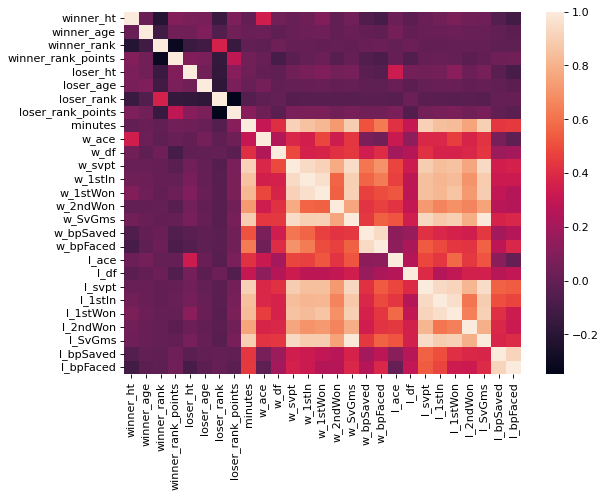

In [17]:
figure = plt.gcf()
figure.set_size_inches(8,6)
figure.set_dpi(80)
sns.heatmap(tennis_df[relevantNumericalCols].corr())


There is a huge square of highly correlated variables, but this doesn't mean much, because that square are all stats that are a function of time!  The longer a match, there more amount of break points, aces, serves, and similar stats there would be.  

But outside of this square, there are only a few correlations that stick out, but they are relatively obvious, like height vs number of aces.  I'll probably come back to tennis_df later, but now I'll check out player_data


### player_data Analysis

<AxesSubplot:title={'center':'Top Ten Players For Wins 2000-2017'}, ylabel='Wins'>

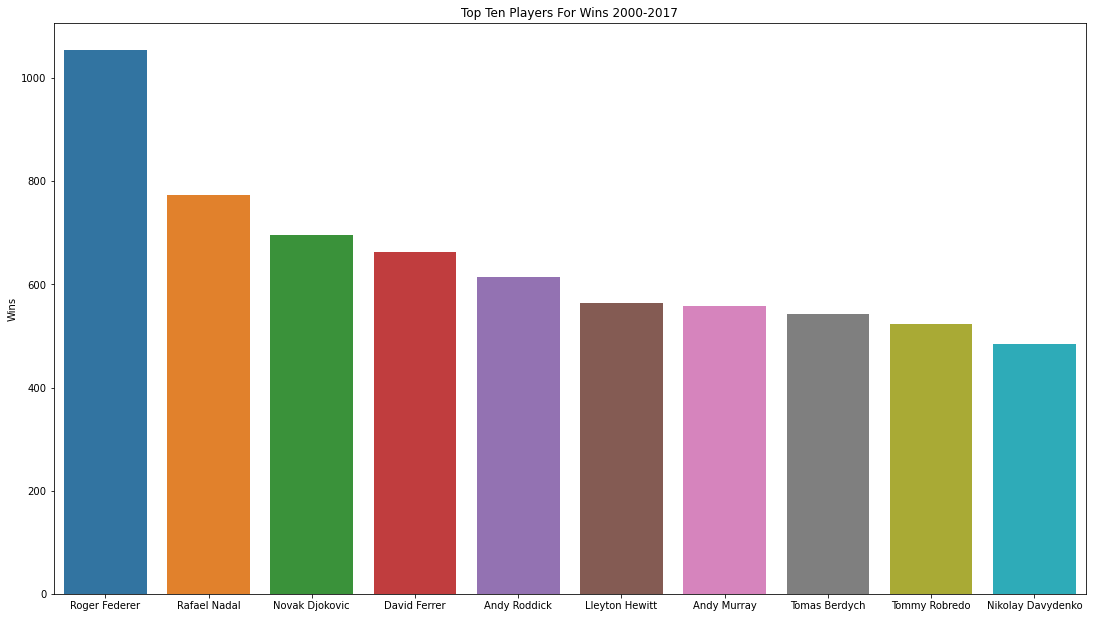

In [18]:
#Wow the Big Three are all up there, and Roger Federer by a large margin!!  I didn't expect Ferrer to be 4th.  
player_data = player_data.sort_values(by = "Wins", ascending = False)
figure = plt.gcf()
figure.set_size_inches(18.5,10.5)
plt.title("Top Ten Players For Wins 2000-2017")
sns.barplot(x = player_data.index[:10], y = player_data.iloc[:10,0])



In [19]:
#ahhh gotta love NumPy for being able to do stuff like this
player_data["WinRate"] = player_data["Wins"]/(player_data["Losses"]+player_data["Wins"])
player_data["MatchesPlayed"] = player_data["Losses"]+player_data["Wins"]
player_data["AvgAcesPerMatch"] = player_data["Aces"]/player_data["MatchesPlayed"]
player_data["1stServeWinRate"] = player_data["1stServeWon"]/player_data["1stServeIn"].replace(0,1)

#Lets create new columns describing more features 
#Let's filter for people who have played more than a 100 matches, so win ratios are not skewed towards people who have
#played little matches
moreThanAHundred = player_data["MatchesPlayed"] >= 100
player_data = player_data[moreThanAHundred]



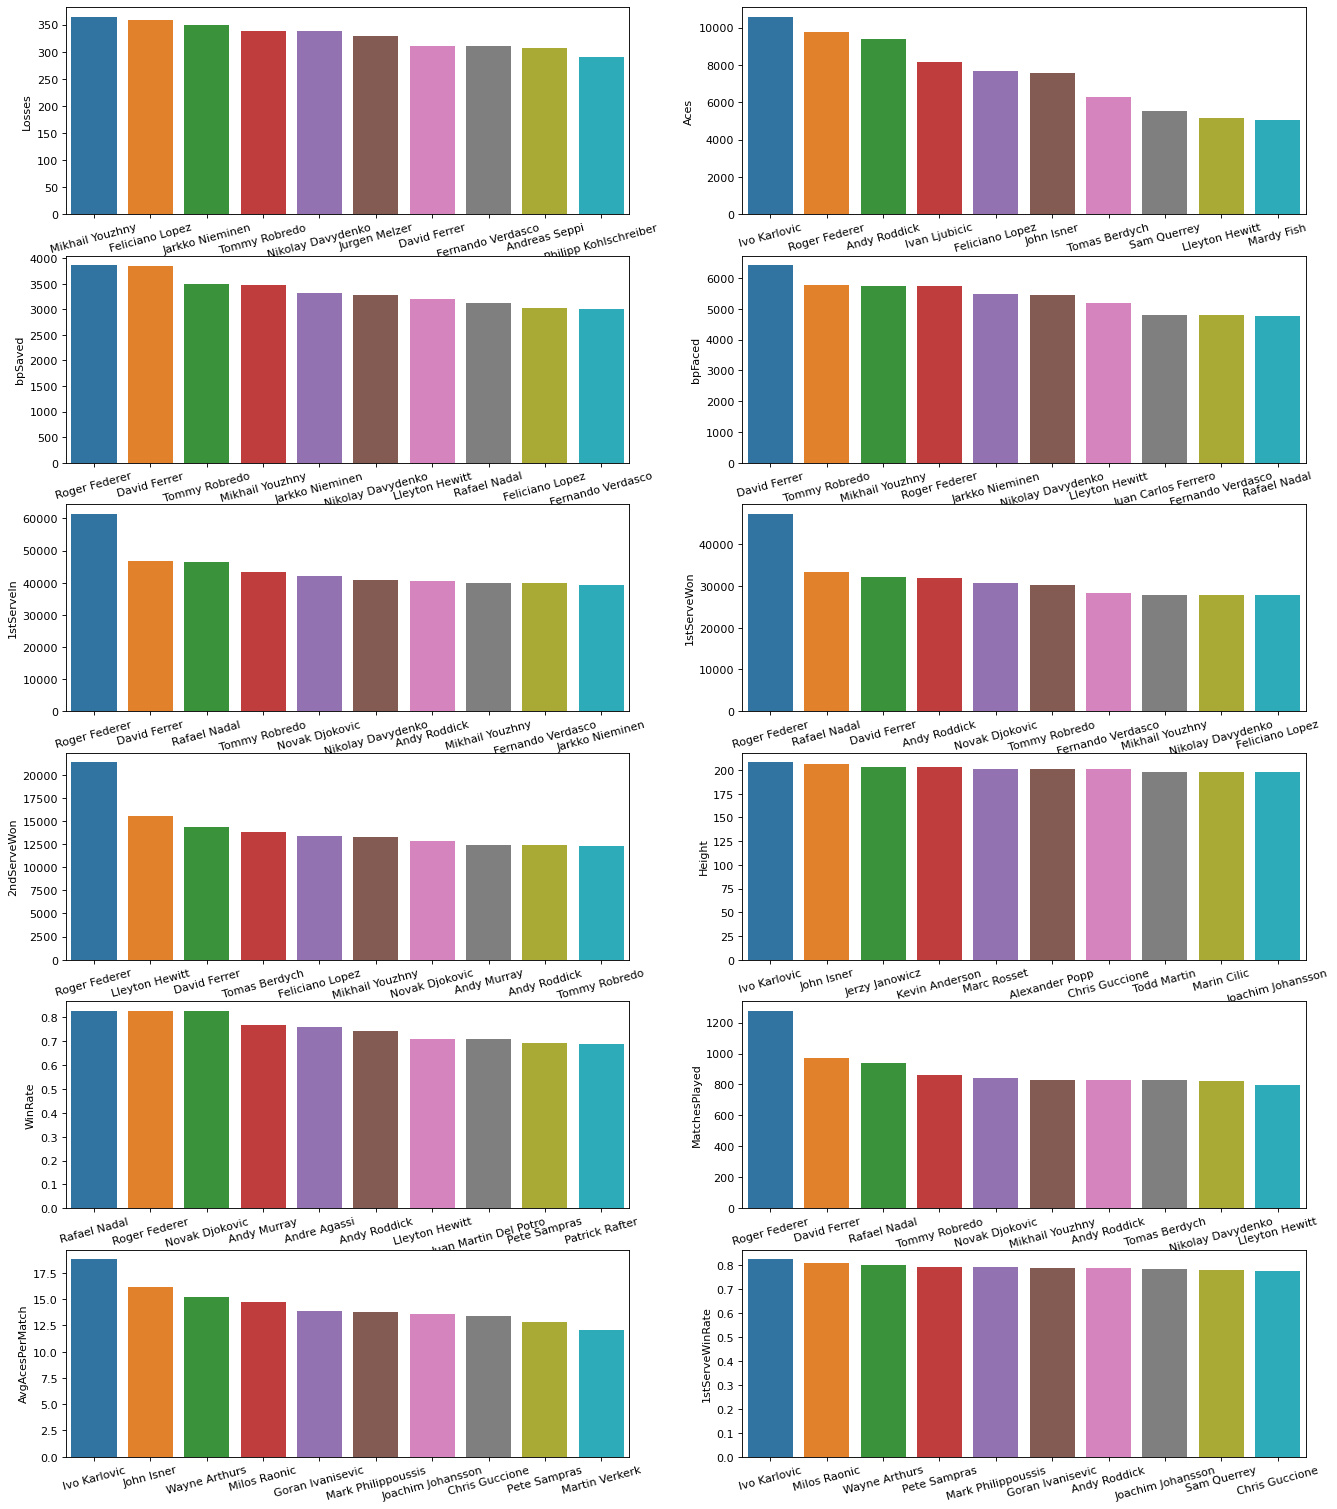

In [20]:
#Now let's graph a bar graph for basically the rest of the statistics!

fig, axs = plt.subplots(nrows = 6, ncols = 2)
fig.set_size_inches(20,24)
fig.set_dpi(80)
n=0
for stat in player_data.columns:
    if stat != 'Hand' and stat != 'Wins':
        player_data = player_data.sort_values(by = stat, ascending = False)
        sns.barplot(x = player_data.index[:10], y = player_data.loc[player_data.index[:10],stat], ax = axs[int(n/2), n%2])
        axs[int(n/2), n%2].tick_params(axis = 'x', labelrotation = 15)
        n+= 1



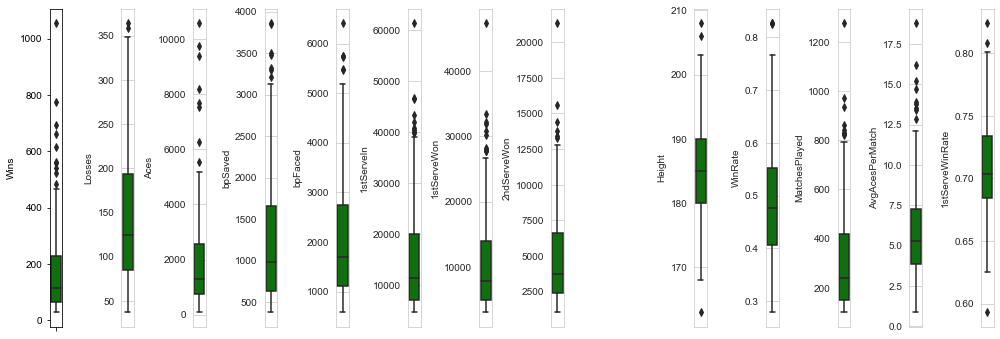

In [21]:
#Let's also create a box plot to see the distribution and any outliers.
l = player_data.columns.values
number_of_columns= player_data.shape[1]
number_of_rows = int(len(l)-1/number_of_columns)
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    if l[i] == 'Hand': continue
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(y = player_data[l[i]],color='green',orient='v')
    plt.tight_layout()

In [22]:
leftVRight = {"L": [], "R": []}
examinedFeatures = ["WinRate","AvgAcesPerMatch","1stServeWinRate"]
for feature in examinedFeatures:
    leftVRight["L"].append(player_data[player_data["Hand"] == "L"][feature].mean())
    leftVRight['R'].append(player_data[player_data["Hand"] == "R"][feature].mean())
pd.DataFrame(leftVRight, index = examinedFeatures)

,L,R
WinRate,0.472325,0.490406
AvgAcesPerMatch,5.943478,5.879608
1stServeWinRate,0.707073,0.709788


Wow! There are plenty of interesting insights to be made here.  
1. The median height of a pro tennis player who has played more than a 100 matches is about 185 cm, or 6'1.  That's very tall!
2. If you make your first serve in, your chances of winning the point is 70 percent!
3. The winrate and 1st Serve win rate is slightly higher for a right-handed person than a left-handed person.  This is interesting because usually being left handed is considered a big advantage.  This statistic either means it is not that big of an advantage, or at the top level, people have found out how to deal with them.
4. The two top people for height are the same top two people for most amount of average aces per game.  There is a correlation there.
5. Roger Federer has played the most matches, and David Ferrer is second.  


### Which "well-known" player has the lowest win rate?

In [23]:
#Mini Project because parents asked lol.  "Who is a well known player that has the lowest win rate?"
#I basically interpreted this to be, "Who of those that has reached top 10 has the lowest win rate?"
tdf = tennis_df[tennis_df["winner_rank"] < 10]
player_data2= player_data.copy()
topTen = tdf["winner_name"].unique()
player_data2.loc[topTen].sort_values("WinRate").head(5)


,Wins,Losses,Aces,bpSaved,bpFaced,1stServeIn,1stServeWon,2ndServeWon,Hand,Height,WinRate,MatchesPlayed,AvgAcesPerMatch,1stServeWinRate
Rainer Schuettler,283,286,2076.922499,2399.98576,4133.589998,26305.25275,18097.812198,9337.513127,R,180.0,0.497364,569,3.650127,0.687992
Nicolas Lapentti,201,202,2074.406987,1677.760928,2855.538031,19209.719016,13593.926233,6290.896763,R,188.0,0.498759,403,5.147412,0.707659
Cedric Pioline,59,58,899.437201,486.164856,791.92981,5073.054847,3810.207689,2258.17111,R,188.0,0.504274,117,7.687497,0.751068
Jurgen Melzer,346,329,3661.470878,2827.475737,4693.416076,32993.850914,23058.416819,10570.418168,L,183.0,0.512593,675,5.424401,0.69887
Todd Martin,77,69,1516.81294,637.752109,1001.11804,8159.172707,6132.396212,2561.695957,R,198.0,0.527397,146,10.38913,0.751595


### Which country has the most wins?

<AxesSubplot:ylabel='winner_ioc'>

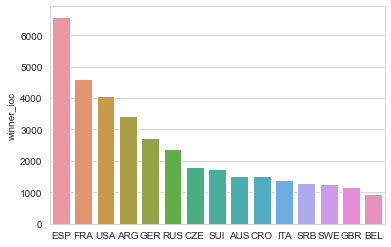

In [24]:
winsByCountry = tennis_df["winner_ioc"].value_counts()
sns.barplot(x = winsByCountry.index[:15], y = winsByCountry[:15])


### Which Country has the most wins that were played in a Grand Slam?

<AxesSubplot:xlabel='winner_ioc', ylabel='count'>

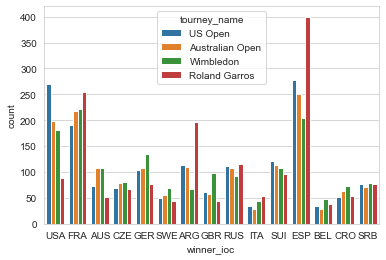

In [25]:
grandSlamNames = {"Roland Garros":True, "Wimbledon":True, "US Open":True, "Australian Open":True}
filterByGrandSlam = tennis_df["tourney_name"].map(grandSlamNames).fillna(False)
gslam_df = tennis_df[filterByGrandSlam]
gslam_df.reset_index()
top15Countries = gslam_df["winner_ioc"].value_counts().sort_values(ascending = False).index[:15]
gslam_df = gslam_df[gslam_df["winner_ioc"].isin(top15Countries)]

sns.countplot(x= "winner_ioc", hue = "tourney_name", data = gslam_df)


### TimeSeries Graph of Player's rankings

The function below is modifiable to see any player's ranking over time. 


In [26]:
import matplotlib.ticker as ticker

def plotRankingOverTime(player_list, min_y_axis):
    notable_players_df = tennis_df[tennis_df["winner_name"].isin(player_list)]
    sns.lineplot(x = "tourney_date", y = "winner_rank", hue = "winner_name", data = notable_players_df)
    plt.gcf().set_size_inches(16,8)
    plt.gcf().set_dpi(80)
    ax = plt.gca()
    ax.set(ylim=(min_y_axis,1))
    ax.xaxis.set_major_locator(ticker.MultipleLocator(25))
    ax.set_ylabel("Rank")
    ax.set_xlabel("Date")
    plt.xticks(rotation = 25)

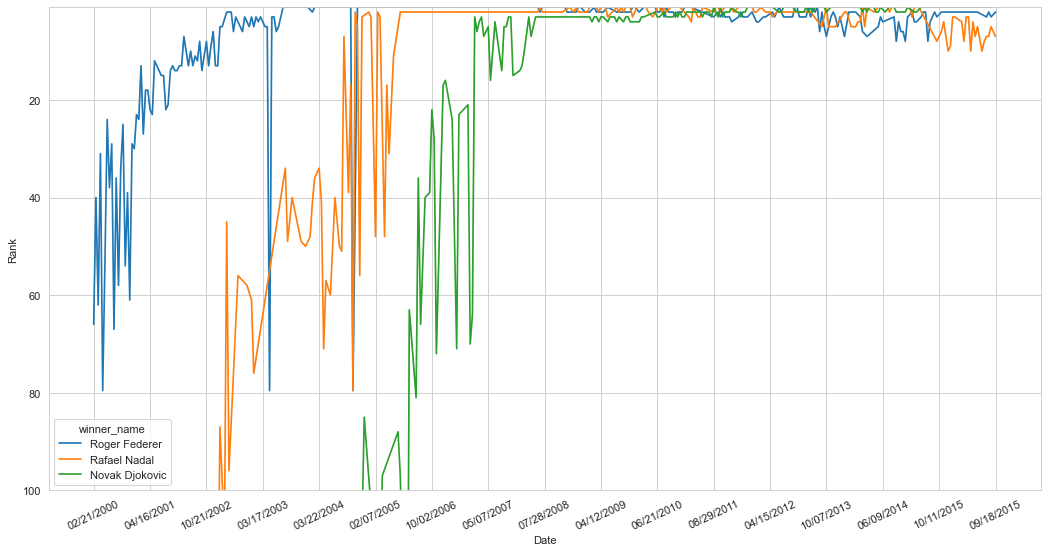

In [27]:
#Federer, Nadal, and Djokovic are known as the Big 3 of Tennis
plotRankingOverTime(["Roger Federer", "Rafael Nadal","Novak Djokovic"],100)

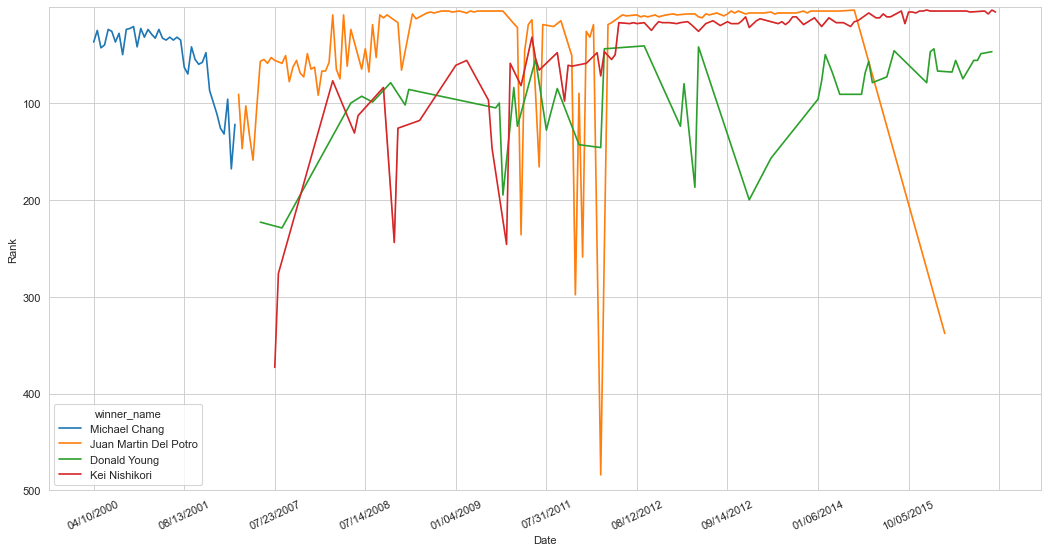

In [28]:
plotRankingOverTime(["Donald Young", "Michael Chang", "Juan Martin Del Potro", "Kei Nishikori"],500)

### Conclusion

That concludes my exploratory data analysis of this huge tennis dataset!  There was no model I was aiming to build and thus no target variable; this was just trying to find and display fun insights or corroborate information already known(eg. the correlation between height and aces).  

